# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [43]:
data = pd.read_csv("G://My Drive\\Colab Notebooks\\Assign_Lab_Regression_Using_ANN\\prices-split-adjusted.csv")
df = pd.DataFrame(data)

In [3]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [5]:
# showing column wise %ge of NaN values they contains
for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)

date 	-	 0.0
symbol 	-	 0.0
open 	-	 0.0
close 	-	 0.0
low 	-	 0.0
high 	-	 0.0
volume 	-	 0.0


#Corelation Matrix

C:\Users\Hamza Iqbal\AppData\Local\Temp\ipykernel_16136\1157181498.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormap = df.corr()


<Axes: >

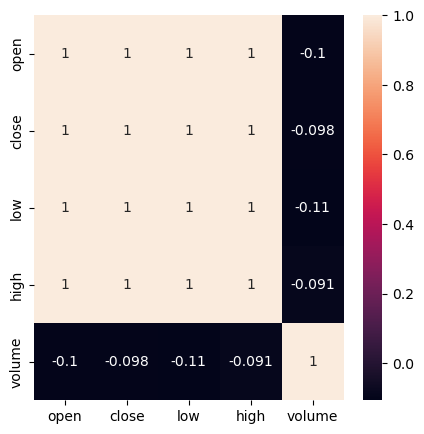

In [44]:
df = df[df['symbol']=='AAP']   # Choosin stock values of Apple
cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [16]:
def get_corelated_col(cor_dat, threshold):
  # Cor_data to be column along which corelation to be measured
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [17]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

,corr value
open,0.999382
close,1.000000
low,0.999615
high,0.999737


In [18]:
df = df[top_corelated_values.index]
df.head()

,open,close,low,high
253,40.700001,40.380001,40.360001,41.040001
720,40.299999,40.139999,39.720001,40.310001
1188,40.049999,40.490002,40.049999,40.779999
1656,39.549999,40.480000,39.549999,40.540001
2124,40.250000,40.639999,40.110001,40.820000


In [19]:
df.shape

(1762, 4)

In [21]:
X = df.drop(['close'], axis=1)
y = df['close']

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,open,low,high
0,0.012001,0.012392,0.010256
1,0.009539,0.008387,0.005746
2,0.008000,0.010452,0.008649
3,0.004923,0.007323,0.007167
4,0.009231,0.010827,0.008897


#ANN

In [23]:
# Model Creation

from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):

    model = Sequential()

    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

#Spliting the data

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

# Model Training

In [38]:
model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
36/36 [==============================] - 1s 8ms/step - loss: 6056.9541 - val_loss: 22076.2715
Epoch 2/150
36/36 [==============================] - 0s 5ms/step - loss: 6032.3369 - val_loss: 21939.7969
Epoch 3/150
36/36 [==============================] - 0s 5ms/step - loss: 5929.3574 - val_loss: 21351.3574
Epoch 4/150
36/36 [==============================] - 0s 5ms/step - loss: 5585.5439 - val_loss: 19580.5488
Epoch 5/150
36/36 [==============================] - 0s 5ms/step - loss: 4744.6191 - val_loss: 15673.7197
Epoch 6/150
36/36 [==============================] - 0s 5ms/step - loss: 3231.1240 - val_loss: 9503.2285
Epoch 7/150
36/36 [==============================] - 0s 5ms/step - loss: 1404.2426 - val_loss: 3411.7566
Epoch 8/150
36/36 [==============================] - 0s 5ms/step - loss: 261.1891 - val_loss: 635.1508
Epoch 9/150
36/36 [==============================] - 0s 5ms/step - loss: 31.8317 - val_loss: 246.9493
Epoch 10/150
36/36 [==============================] - 0

# Prediction

In [39]:
y_pred_2 = model_2.predict(X_test)

12/12 [==============================] - 0s 1ms/step


In [40]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,174.448730
675608,171.919998,172.759338
676105,172.000000,170.963303
676602,187.789993,179.635178
677099,187.029999,188.527084


In [41]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9878269223917644


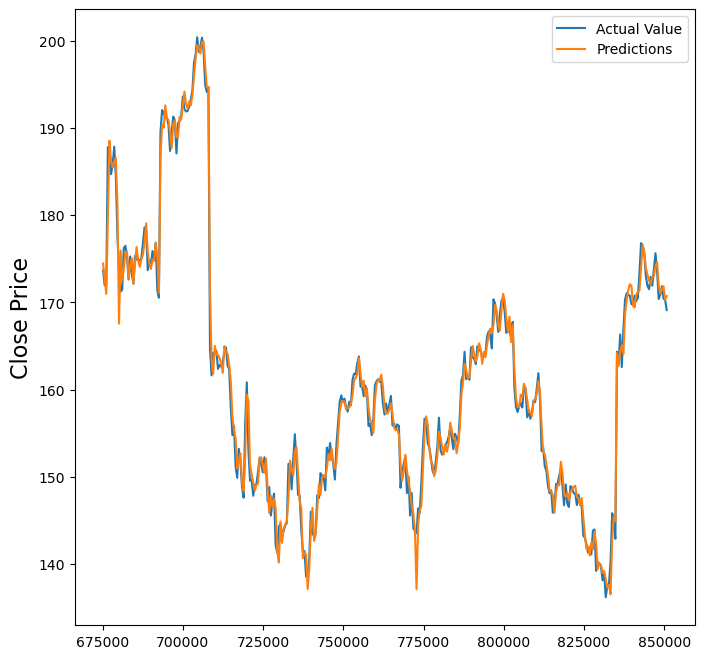

In [42]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

#Conclusion
The code is an end-to-end implementation of stock price prediction using Artificial Neural Networks (ANNs). It starts by importing the necessary Python libraries and then loads a dataset containing stock prices. The data is preprocessed to focus on a particular company stocks Apple ('AAP') and correlated features are identified. Data is then split into training and test sets, scaled, and used to train a simple neural network model. The model is evaluated using the R^2 score, and both actual and predicted stock prices are visualized.